In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

Lab1

In [65]:
def parse_log(text: str) -> pd.DataFrame:
    columns = ["Size", "withoutParallel", "time1", "withInstrinsics", "time2", "withVectorExtensions", "time3"]
    df = pd.DataFrame(columns=columns)

    start = 0; end = 7
    for i in tqdm(range(0,len(text),7)):
        batch_data = []
        for line in text[start + i: end + i]:
            data = line.split(" ")[2].strip()
            batch_data.append(data)
        tmp_df = pd.DataFrame([batch_data], columns=columns)
        df = df.append(tmp_df, ignore_index=True)

    df['time1'] = df['time1'].astype('int')
    df['time2'] = df['time2'].astype('int')
    df['time3'] = df['time3'].astype('int')
    return df

def moving_average(interval: list, windowsize: int):
    window = np.ones(int(windowsize)) / float(windowsize)
    new = np.convolve(interval, window, 'same')
    return new

def get_plot(df: pd.DataFrame, path_to_save_figure: str = None, w: int = 3) -> None:
    plt.figure(figsize=(20, 20), dpi=80)

    start_xtick = int(df['Size'].values[0])
    end_xtick = int(df['Size'].values[-1])

    plt.plot(df['Size'], moving_average(df['time1'], w), label = "withoutParallel", linestyle="-")
    plt.plot(df['Size'], moving_average(df['time2'], w), label = "withInstrinsics", linestyle="-")
    plt.plot(df['Size'], moving_average(df['time3'], w), label = "withVectorExtensions", linestyle="-")
    plt.xticks(np.arange(start_xtick, end_xtick, step=20))
    plt.legend()
    plt.title("Зависимость числа тактов при расчете длины разности векторов от длины вектора")
    plt.xlabel("Длина вектора")
    plt.ylabel("Число тактов (__rdtsc)")
    plt.grid()
    plt.savefig(path_to_save_figure)

def main(path_to_logger: str, path_to_save_figure: str) -> None:
    with open(path_to_logger, "r") as file:
        text = file.readlines()
    df = parse_log(text)
    get_plot(df=df, path_to_save_figure=path_to_save_figure)

100%|██████████| 496/496 [00:00<00:00, 2787.07it/s]


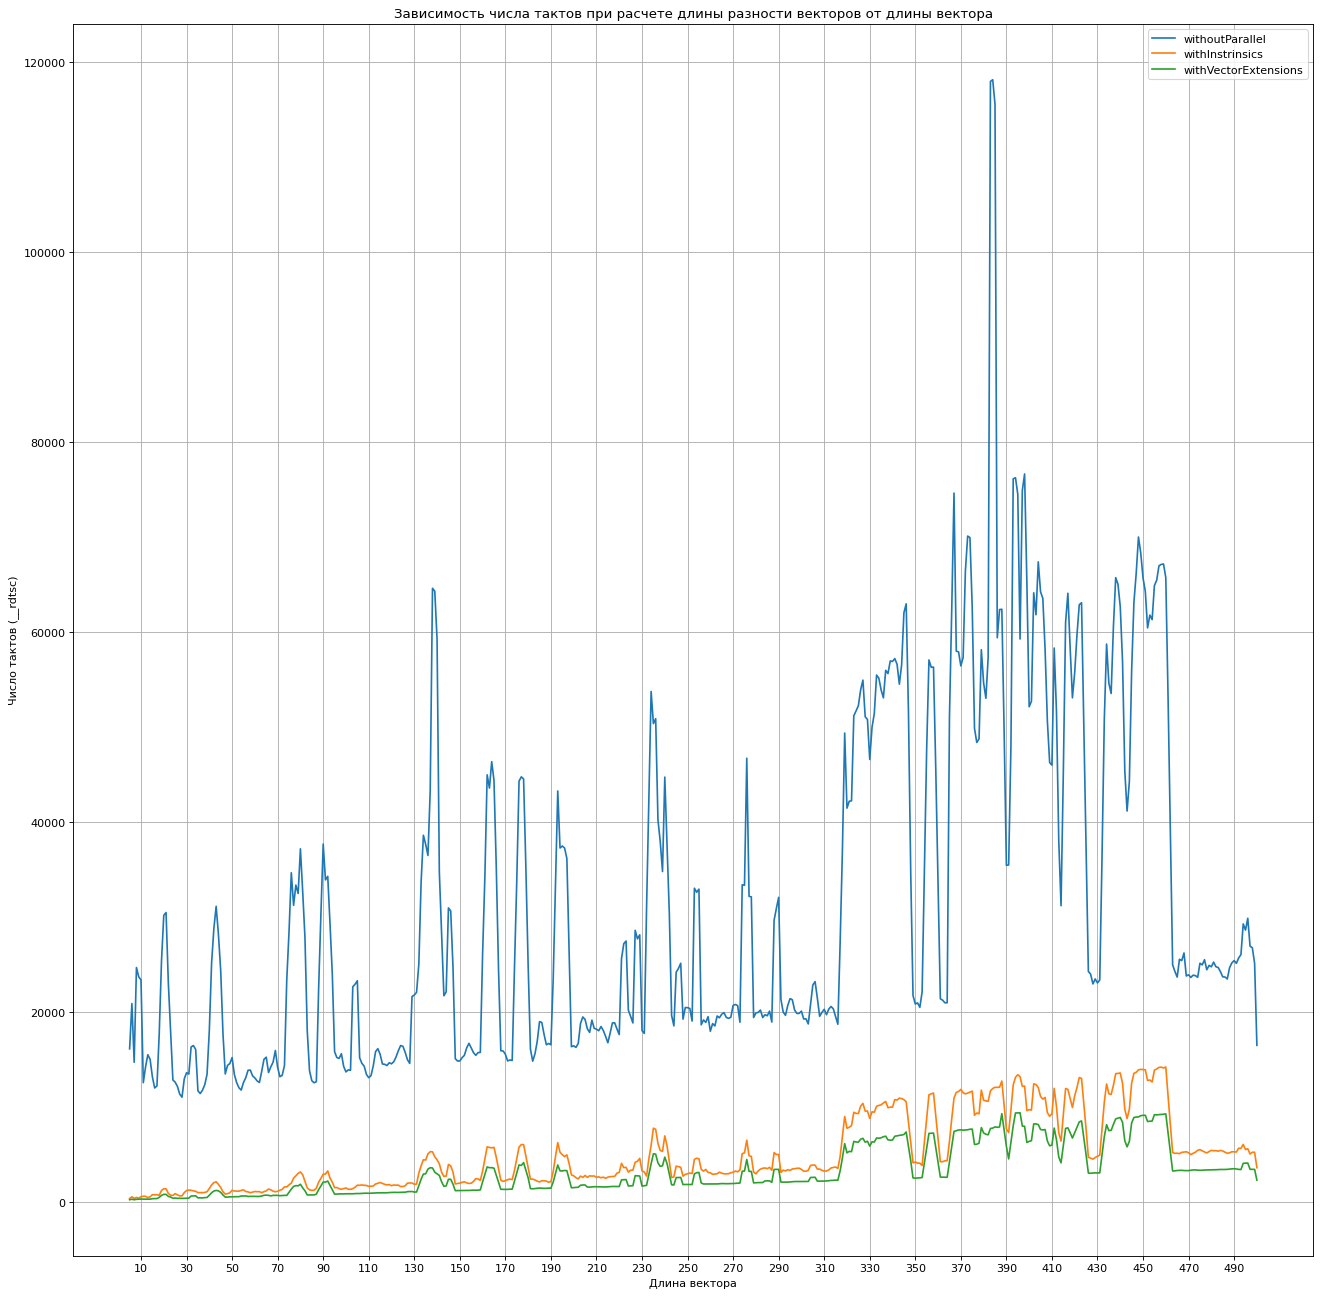

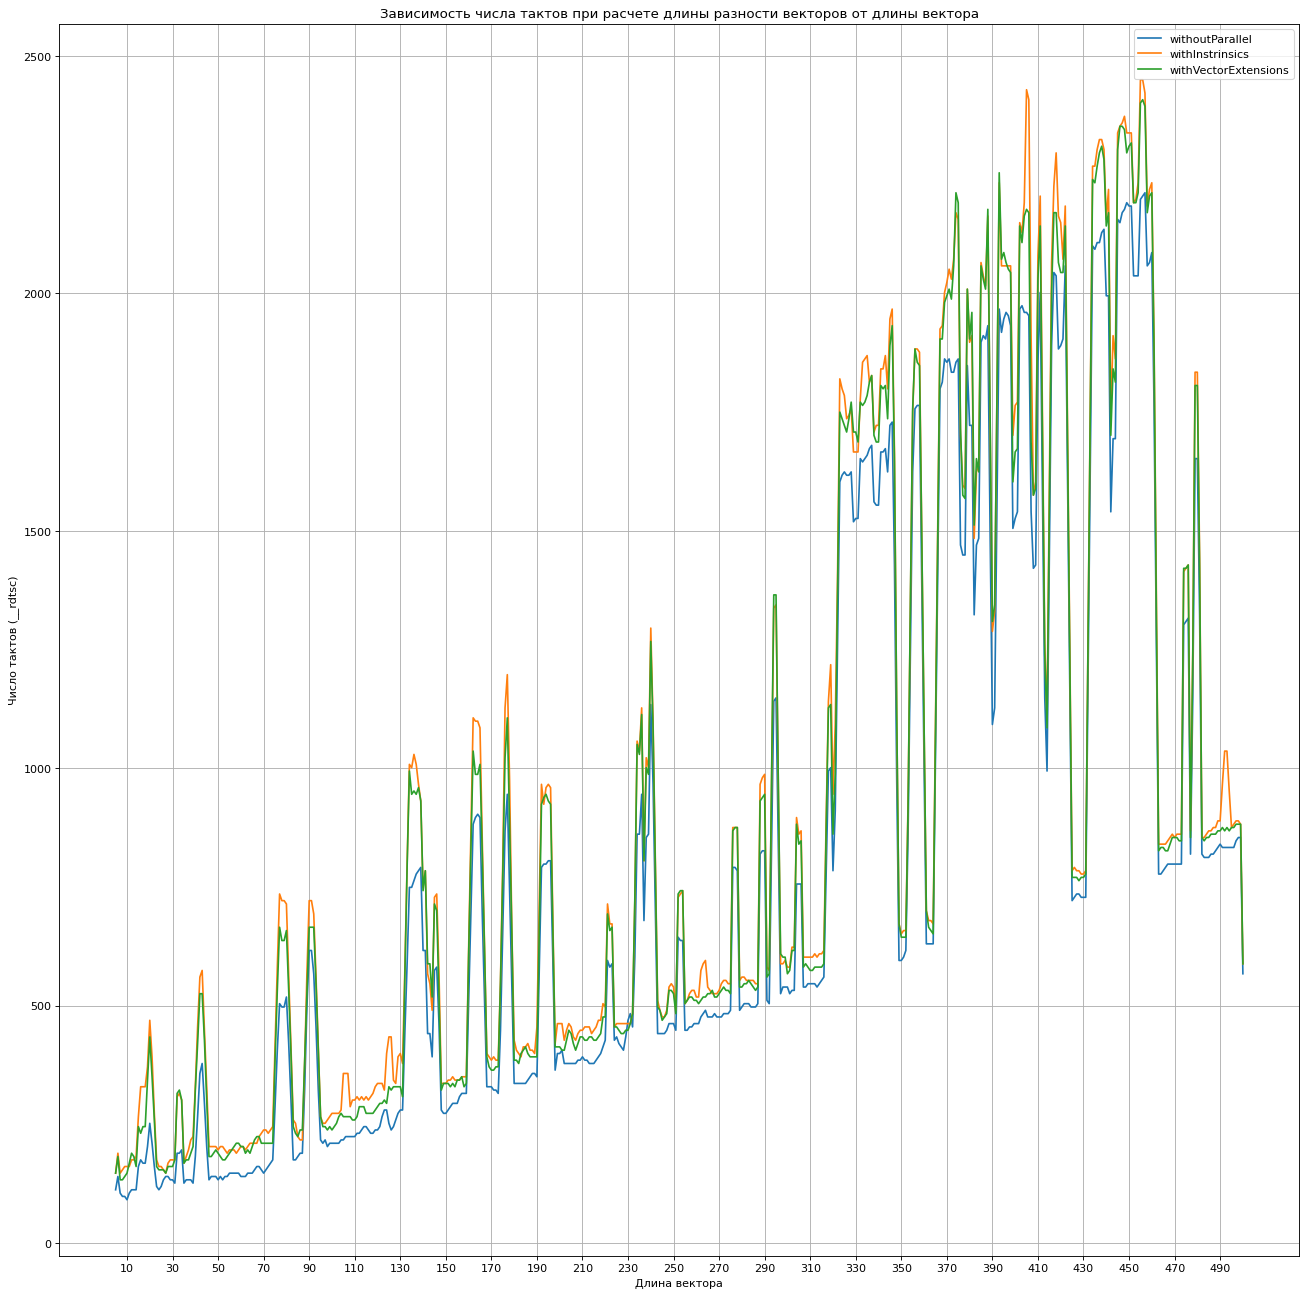

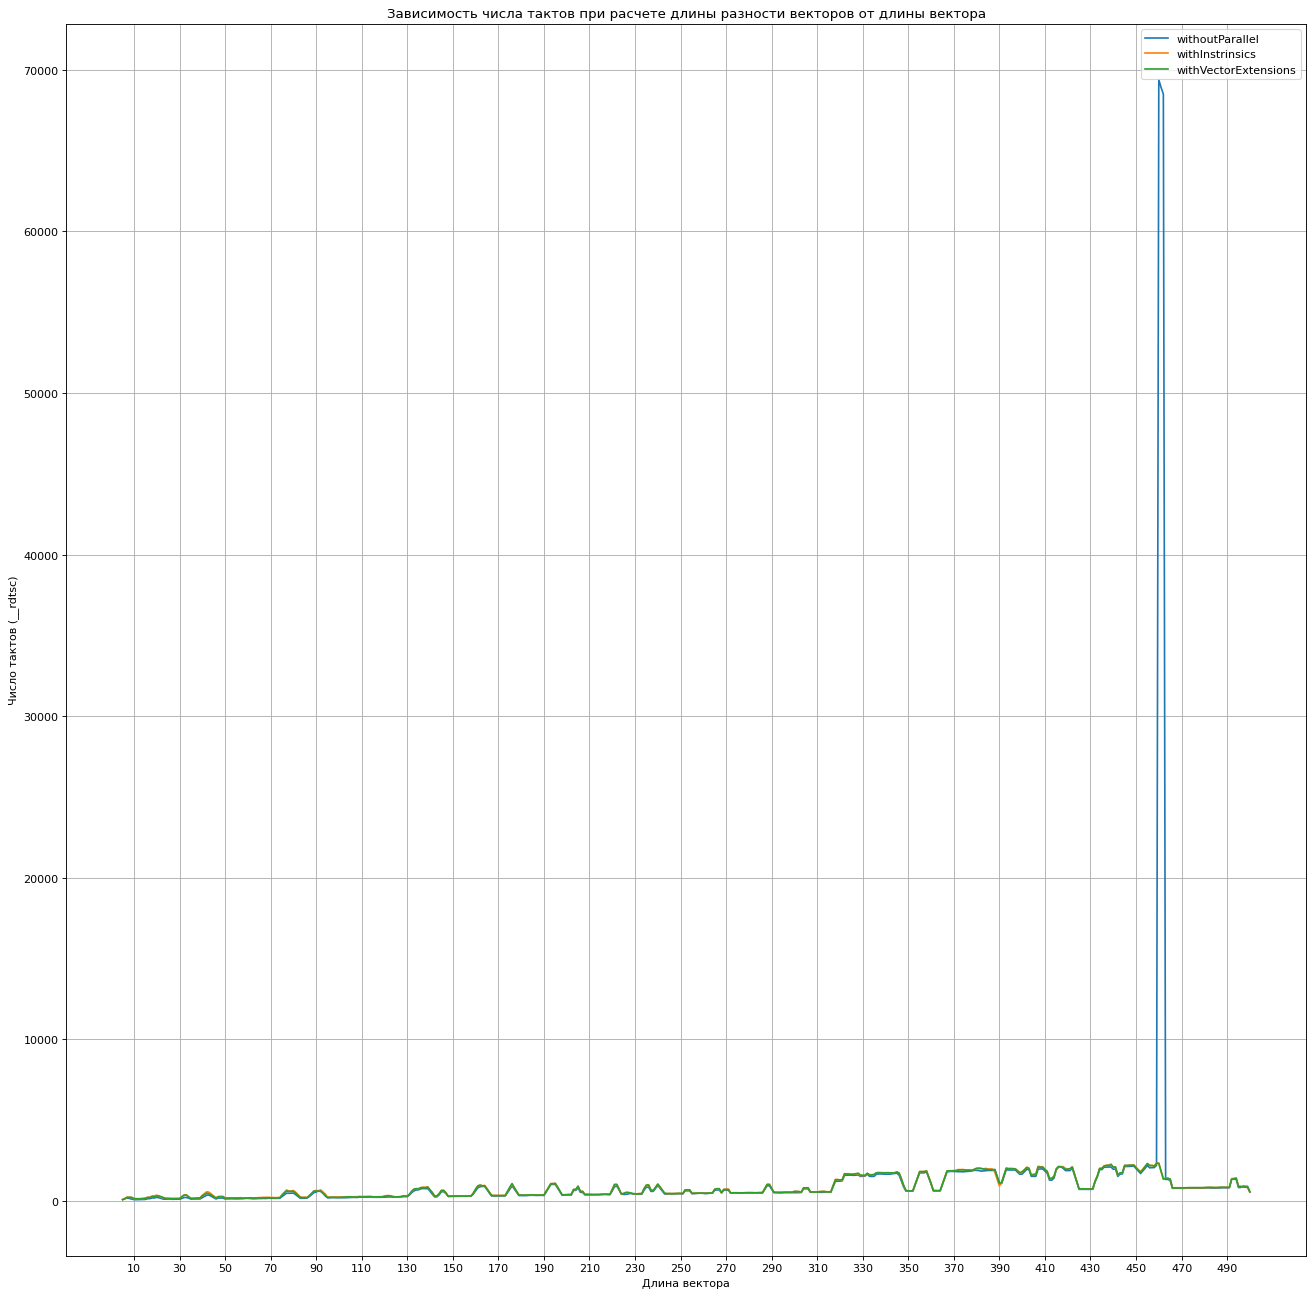

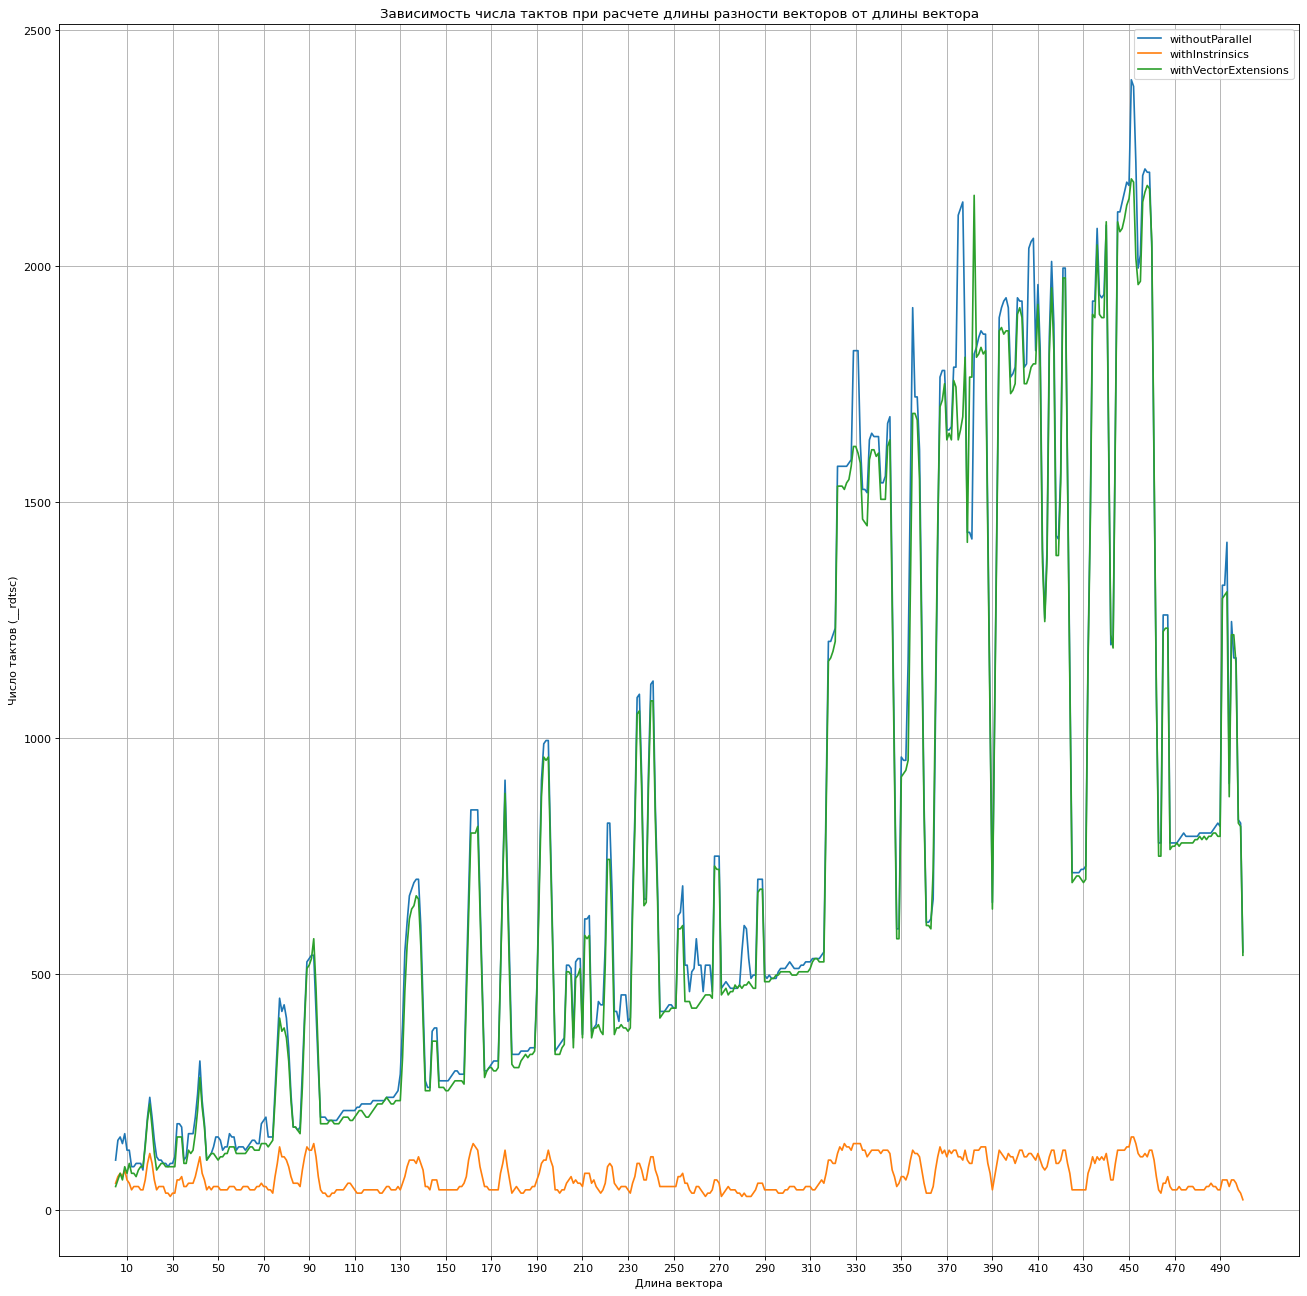

In [66]:
BASE_DIR = "/home/pavel/dev/university_homeworks/university_homeworks/sem1/Parallel_computing_and_software_models/"

for i in range(0, 4):
    main(BASE_DIR + f"logger{i}", BASE_DIR + f"plots/plot{i}.png")

Lab2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [30]:
def parse_log(text: str) -> pd.DataFrame:
    columns = ["Size", "withoutParallel", "time1"]
    df = pd.DataFrame(columns=columns)

    start = 0; end = 3
    for i in tqdm(range(0,len(text),3)):
        batch_data = []
        for line in text[start + i: end + i]:
            data = line.split(" ")[2].strip()
            batch_data.append(data)
        tmp_df = pd.DataFrame([batch_data], columns=columns)
        df = df.append(tmp_df, ignore_index=True)

    df['time1'] = df['time1'].astype('float')
    return df

def moving_average(interval: list, windowsize: int):
    window = np.ones(int(windowsize)) / float(windowsize)
    new = np.convolve(interval, window, 'same')
    return new

def get_plot(df: pd.DataFrame, w: int = 300) -> None:
    plt.figure(figsize=(20, 20), dpi=80)

    start_xtick = int(df['Size'].values[0])
    end_xtick = int(df['Size'].values[-1])

    plt.plot(df['Size'], moving_average(df['time1'], w), label = "withoutParallel", linestyle="-")
    plt.plot(df['Size'], moving_average(df['time2'], w), label = "OpenMP", linestyle="-")
    plt.plot(df['Size'], moving_average(df['time3'], w), label = "Posix", linestyle="-")
    plt.xticks(np.arange(start_xtick, end_xtick, step=500))
    plt.legend()
    plt.title("Зависимость числа тактов при расчете длины разности векторов от длины вектора")
    plt.xlabel("Длина вектора")
    plt.ylabel("Число тактов (__rdtsc)")
    plt.grid()

def main(path_to_logger0: str, path_to_logger1: str, path_to_logger2: str) -> None:
    with open(path_to_logger0, "r") as file:
        text0 = file.readlines()
    df0 = parse_log(text0)

    with open(path_to_logger1, "r") as file:
        text1 = file.readlines()
    df1 = parse_log(text1)
    df1.rename(columns = {
        'withoutParallel': 'OpenMP',
        'time1': 'time2'
    }, inplace=True)
    df1.drop(['Size'], axis=1, inplace=True)

    with open(path_to_logger2, "r") as file:
        text2 = file.readlines()
    df2 = parse_log(text2)
    df2.rename(columns = {
        'withoutParallel': 'Posix',
        'time1': 'time3'
    }, inplace=True)
    df2.drop(['Size'], axis=1, inplace=True)

    df = pd.concat([df0, df1, df2], axis=1)
    get_plot(df=df)

100%|██████████| 3991/3991 [00:02<00:00, 1949.97it/s]


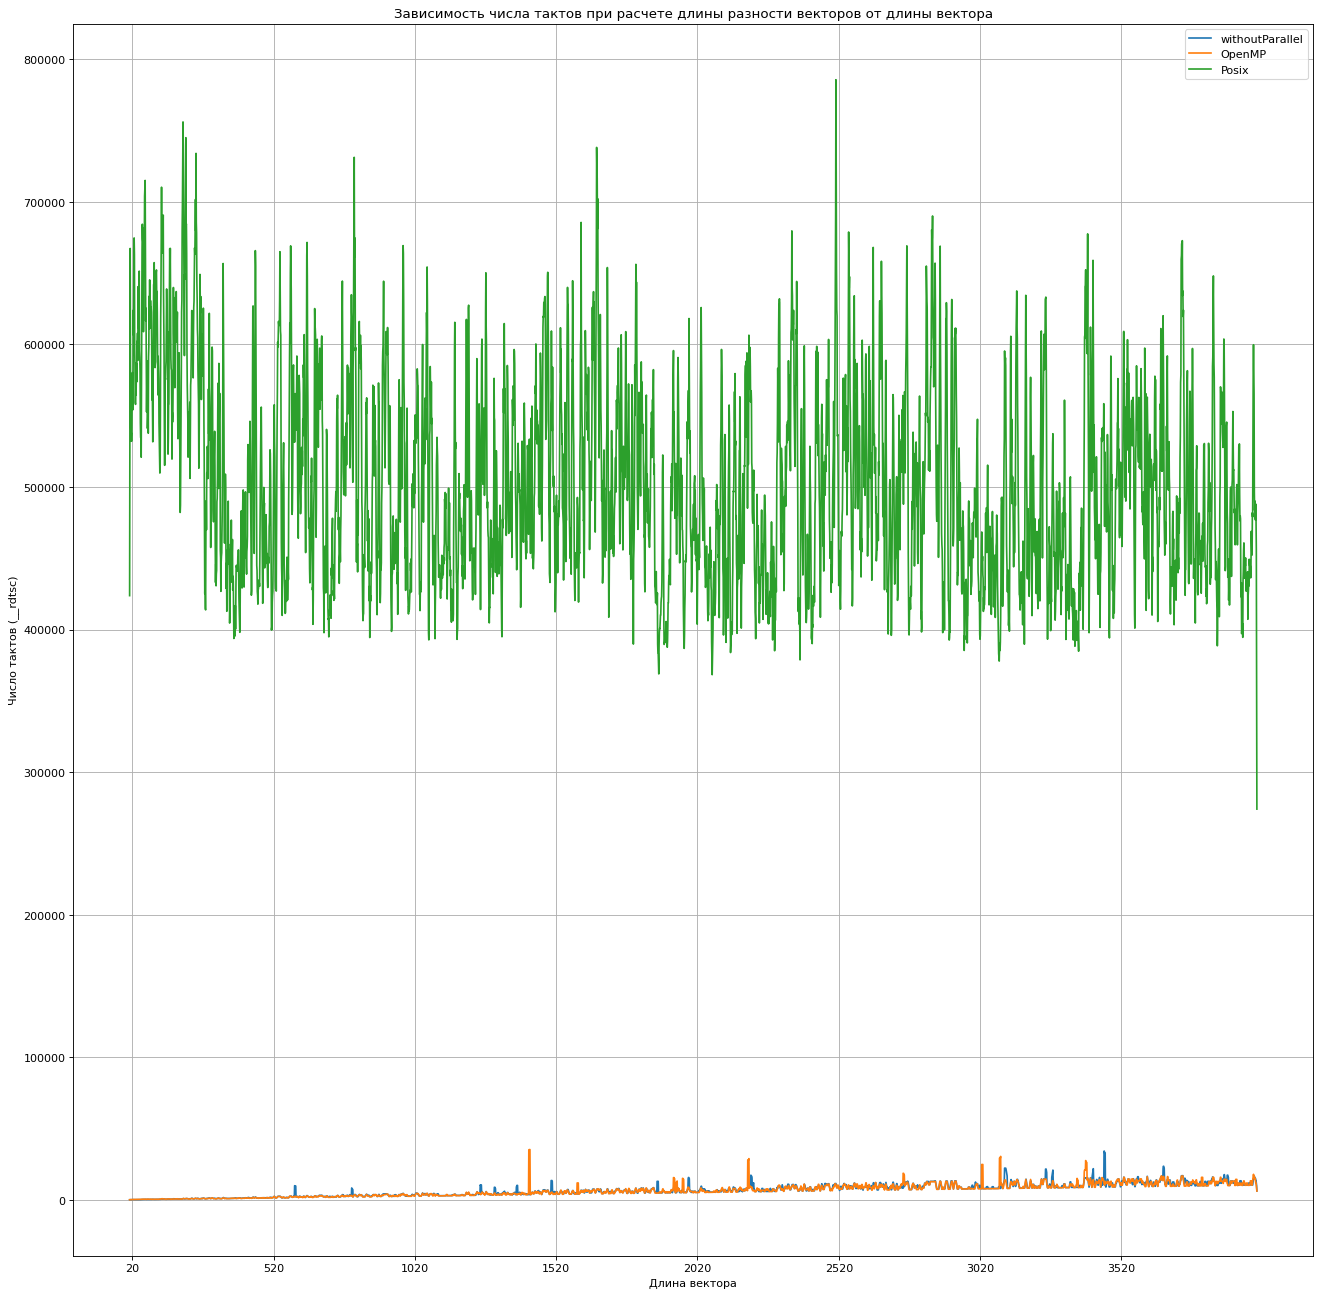

In [29]:
BASE_DIR = "/home/pavel/dev/university_homeworks/university_homeworks/sem1/Parallel_computing_and_software_models/Lab2/"

main(BASE_DIR + "logger0", BASE_DIR + "logger1", BASE_DIR + "logger2")

In [20]:
# columns = ["Size", "withoutParallel", "time1"]
# df = pd.DataFrame(columns=columns)
#
# start = 0; end = 3
# for i in tqdm(range(0,len(text),3)):
#     batch_data = []
#     for line in text[start + i: end + i]:
#         data = line.split(" ")[2].strip()
#         batch_data.append(data)
#     tmp_df = pd.DataFrame([batch_data], columns=columns)
#     df = df.append(tmp_df, ignore_index=True)
#
# df["time1"] = df["time1"].astype(str).astype(float)

100%|██████████| 4901/4901 [00:02<00:00, 1880.40it/s]


In [5]:
df2

NameError: name 'df2' is not defined